# **Profiling Loan Customer**

**Deskripsi Singkat**

Projek ini adalah sebuah analisis yang bertujuan untuk memahami dan menggambarkan profil pelanggan pinjaman. Dalam proyek ini, data pelanggan pinjaman akan diselidiki dan dianalisis untuk mendapatkan wawasan tentang karakteristik, perilaku, dan kebiasaan pelanggan yang mengajukan pinjaman.

**Objektif**

Memahami dan menggambarkan profil pelanggan pinjaman

**Dashboard Visualisasi**

Saya menggunakan powerBI non premium, oleh karena itu tidak dapat melakukan embed link. Maka akan saya lampirkan dalam bentuk pdf pada github repository

# Introduction

Name: Bagus Tirta Aji Hakim

A junior data scientist with logistic engineering background. Having knowledge in distribution, warehousing, and supply chain management. I have a non-formal data analysis educational experience in the Studi Independen Bersertifikat and Digital Talent Scholarship. Positively adaptable, willing to learn, ardworking, and passionate person with solid organizational skills. Ready to help the team to achieve company goals.

# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1 - Import Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2 - Import Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Talent Fair Challenge/dataset/lion-loan-train.csv")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# 3 - Exploratory Data Analysis

## a. Missing Values Analysis

In [ ]:
total_data = len(df)
missing_data = df.isnull().sum()
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'total data': total_data,
                                 'missing_data': missing_data,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values(by = 'percent_missing', ascending=False)

,total data,missing_data,percent_missing
Credit_History,614,50,8.143322
Self_Employed,614,32,5.211726
LoanAmount,614,22,3.583062
Dependents,614,15,2.442997
Loan_Amount_Term,614,14,2.280130
Gender,614,13,2.117264
Married,614,3,0.488599
Loan_ID,614,0,0.000000
Education,614,0,0.000000
ApplicantIncome,614,0,0.000000


> **Loan Amount Term**

In [ ]:
df[df.Loan_Amount_Term.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


In [ ]:
df_copy = df.copy()
df_copy['loan_term_null'] = np.where(df_copy.Loan_Amount_Term.isnull(), 1, 0)
df_copy

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,loan_term_null
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0


In [ ]:
print('Value Counts')
print(df_copy.groupby(['Loan_Status'])['loan_term_null'].value_counts())

print('\nMean')
print(df_copy.groupby(['Loan_Status'])['loan_term_null'].mean())

Value Counts
Loan_Status  loan_term_null
N            0                 186
             1                   6
Y            0                 414
             1                   8
Name: loan_term_null, dtype: int64

Mean
Loan_Status
N    0.031250
Y    0.018957
Name: loan_term_null, dtype: float64


Setelah melakukan eksplorasi, ditemukan bahwa presentasi missing values pada variabel "long_term" lebih tinggi pada customer yang tidak mendapatkan pinjaman daripada customer yang mendapatkan pinjaman.

Penulis yakin bahwa customer yang tidak mendapatkan pinjaman kemungkinan besar tidak memiliki value pada variabel "long_term" atau value tersebut bernilai null. Hal ini disebabkan karena customer yang tidak mendapatkan pinjaman tidak perlu menginput value untuk jangka waktu peminjaman.

Dengan demikian, dapat disimpulkan bahwa presentasi missing values pada variabel "long_term" secara signifikan terkait dengan status penerimaan pinjaman oleh customer.

In [ ]:
df_copy = df.copy()
df_copy['Dependents_null'] = np.where(df_copy.Dependents.isnull(), 1, 0)
df_copy

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_null
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0


In [ ]:
def corr(df, column):
    # Calculate correlation matrix
    correlation_matrix = df.corr()

    # Plot heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

    # Print correlation values
    correlations = correlation_matrix[column].drop(column)
    print(f"Correlations with `{column}`:")
    print(correlations)

<ipython-input-26-f5b021a61fac>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Correlations with `ApplicantIncome`:
CoapplicantIncome   -0.116605
LoanAmount           0.570909
Loan_Amount_Term    -0.045306
Credit_History      -0.014715
Name: ApplicantIncome, dtype: float64


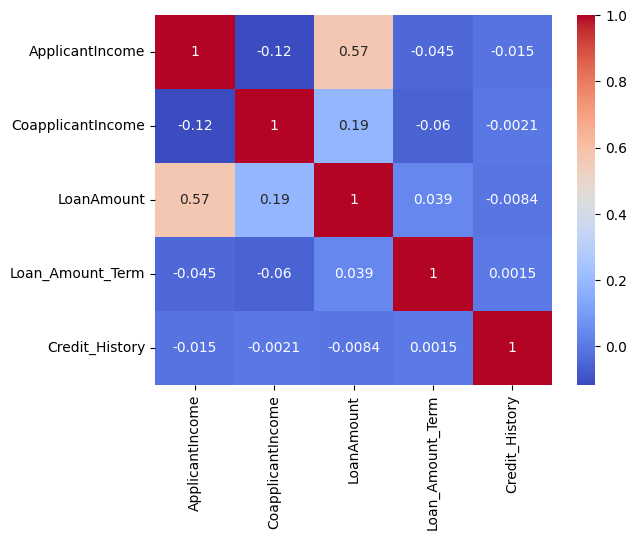

In [ ]:
corr(df, 'ApplicantIncome')

- ApplicantIncome : Tidak ada missing
- CoapplicantIncome : MCAR
- LoanAmount : MAR
- Loan_Amount_Term : MCAR
- Credit_History : MCAR

## b. Data Distribution

In [ ]:
# Get Numerical Columns and Categorical Columns

num_columns = df.select_dtypes(include=np.number).columns.tolist()
cat_columns = df.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorical Columns :  ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [ ]:
def cek_skew(skew):

    if -0.5 < skew < 0.5:
        return 'Data cukup simetris'
    elif -1 < skew < -0.5:
        return 'Data cukup miring'
    else:
        return 'Data sangat miring'

Text(20000, 70, '6.539513113994625 (Data sangat miring)')

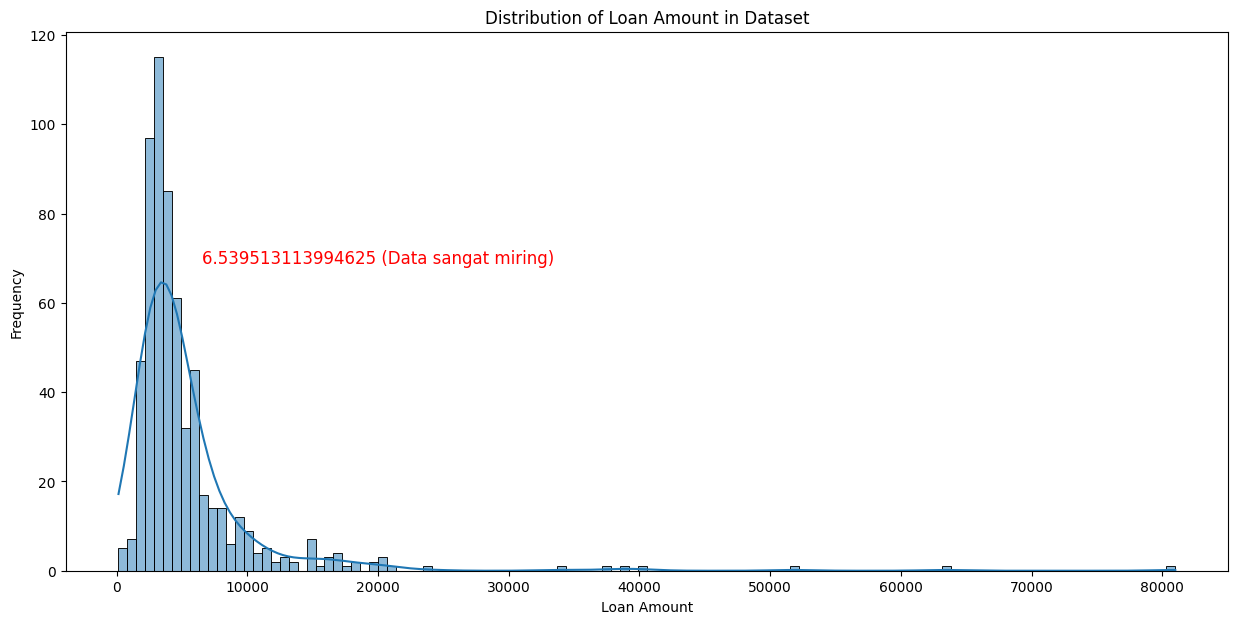

In [ ]:
# Let's Check Type of Distribution of Variable `ApplicantIncome`
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

sns.histplot(df['ApplicantIncome'], kde=True)  # Histogram of the 'ApplicantIncome' column
ax.set_title('Distribution of Loan Amount in Dataset')
ax.set_xlabel('Loan Amount')
ax.set_ylabel('Frequency')

result = cek_skew(df['ApplicantIncome'].skew())
ax.text(20000, 70, f"{df['ApplicantIncome'].skew()} ({result})", ha='center', va='center', fontsize=12, color='red')

Text(10000, 70, '7.491531216657306 (Data sangat miring)')

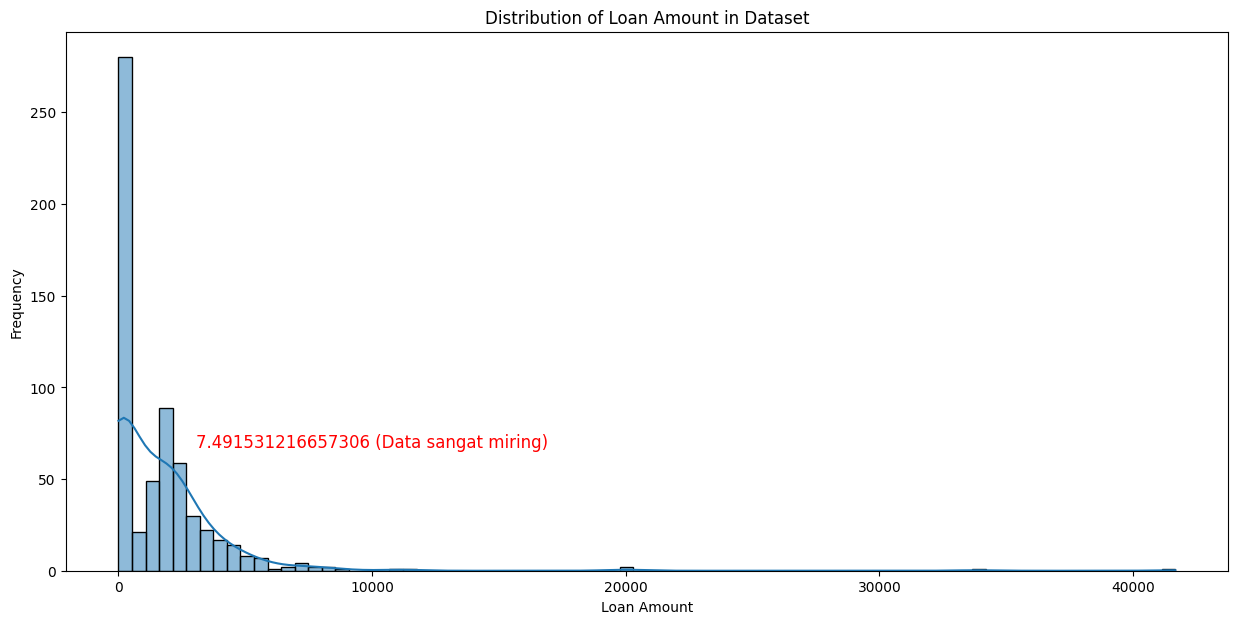

In [ ]:
# Let's Check Type of Distribution of Variable `CoapplicantIncome`
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

sns.histplot(df['CoapplicantIncome'], kde=True)  # Histogram of the 'CoapplicantIncome' column
ax.set_title('Distribution of Loan Amount in Dataset')
ax.set_xlabel('Loan Amount')
ax.set_ylabel('Frequency')

result = cek_skew(df['CoapplicantIncome'].skew())
ax.text(10000, 70, f"{df['CoapplicantIncome'].skew()} ({result})", ha='center', va='center', fontsize=12, color='red')

Text(300, 70, '2.677551679256059 (Data sangat miring)')

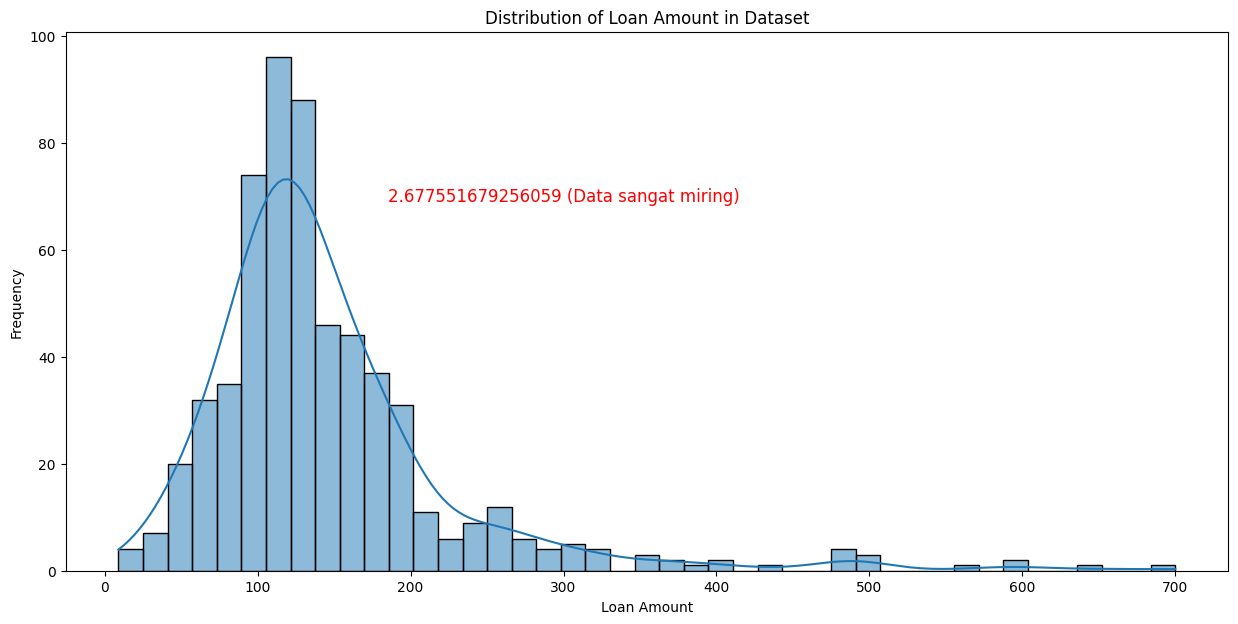

In [ ]:
# Let's Check Type of Distribution of Variable `LoanAmount`
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

sns.histplot(df['LoanAmount'], kde=True)  # Histogram of the 'LoanAmount' column
ax.set_title('Distribution of Loan Amount in Dataset')
ax.set_xlabel('Loan Amount')
ax.set_ylabel('Frequency')

result = cek_skew(df['LoanAmount'].skew())
ax.text(300, 70, f"{df['LoanAmount'].skew()} ({result})", ha='center', va='center', fontsize=12, color='red')

Text(1, 1, '-1.8823610612186696 (Data sangat miring)')

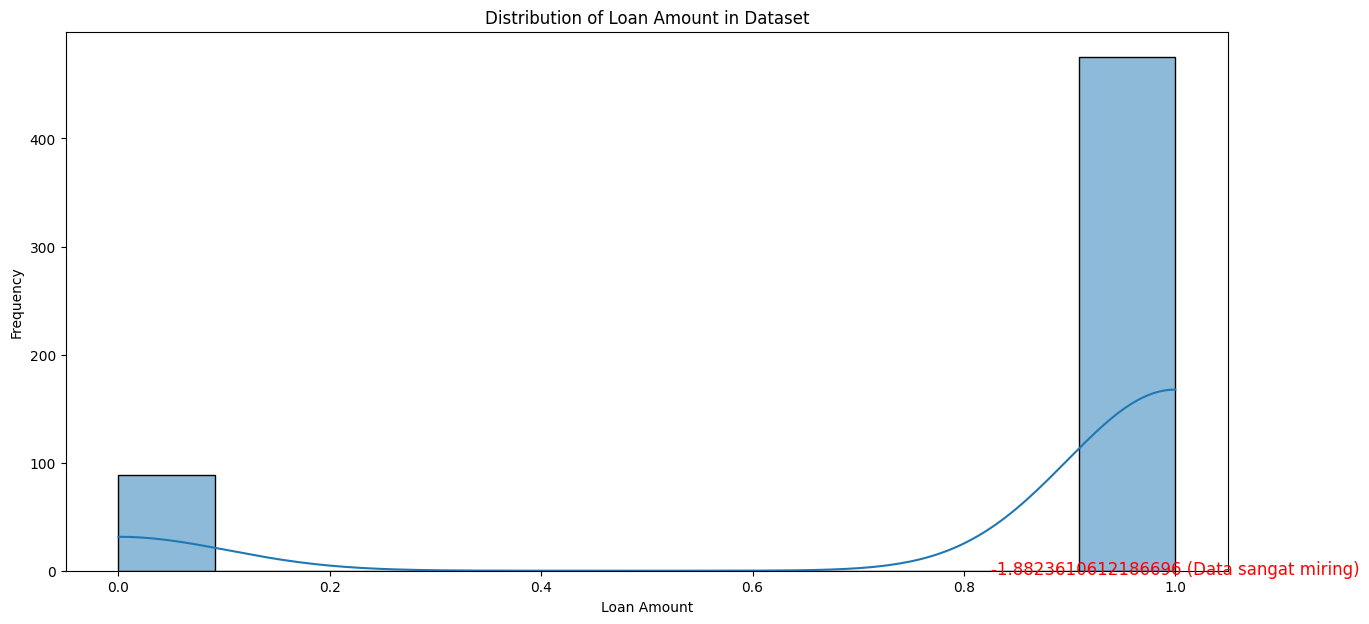

In [ ]:
# Let's Check Type of Distribution of Variable `Credit_History`
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

sns.histplot(df['Credit_History'], kde=True)  # Histogram of the 'Credit_History' column
ax.set_title('Distribution of Loan Amount in Dataset')
ax.set_xlabel('Loan Amount')
ax.set_ylabel('Frequency')

result = cek_skew(df['Credit_History'].skew())
ax.text(1, 1, f"{df['Credit_History'].skew()} ({result})", ha='center', va='center', fontsize=12, color='red')

In [ ]:
df1 = df.copy()

In [ ]:
# Display Value of Median Before Imputation

mean_LoanAmount = df['LoanAmount'].mean()
median_LoanAmount = df['LoanAmount'].median()

print('\033[93mBefore Imputation\033[0m')
print('Mean Value - Train Set   : ', mean_LoanAmount)
print('Median Value - Train Set : ', median_LoanAmount)

Before Imputation
Mean Value - Train Set   :  146.41216216216216
Median Value - Train Set :  128.0


In [ ]:
# Function to Filling Missing Values with Zeroes, Mean, and Median

def impute_na(df, variable, mean_value, median_value):
  df[variable+'_mean'] = df[variable].fillna(mean_value)
  df[variable+'_median'] = df[variable].fillna(median_value)
  df[variable+'_zero'] = df[variable].fillna(0)
  
  return df

In [ ]:
# Imputation Against Variable `LoanAmount`

df1 = impute_na(df1, 'LoanAmount', mean_LoanAmount, median_LoanAmount)

In [ ]:
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_mean,LoanAmount_median,LoanAmount_zero
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,146.412162,128.0,0.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,128.000000,128.0,128.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,66.000000,66.0,66.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,120.000000,120.0,120.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,141.000000,141.0,141.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,71.000000,71.0,71.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,40.000000,40.0,40.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,253.000000,253.0,253.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,187.000000,187.0,187.0


In [ ]:
# We can see a change in the variance after imputation

print('Variance - Orignal                 : ', df1['LoanAmount'].std())
print('Variance - After Mean Imputation   : ', df1['LoanAmount_mean'].std())
print('Variance - After Median Imputation : ', df1['LoanAmount_median'].std())

Variance - Orignal                 :  85.58732523570545
Variance - After Mean Imputation   :  84.03746768319648
Variance - After Median Imputation :  84.10723338042614


In [ ]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
def flt_to_int(df, columns):
  df[columns] = df[columns].astype(int)
  return df

In [ ]:
columns_flt = ['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

df = flt_to_int(df, columns_flt)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            480 non-null    object
 1   Gender             480 non-null    object
 2   Married            480 non-null    object
 3   Dependents         480 non-null    object
 4   Education          480 non-null    object
 5   Self_Employed      480 non-null    object
 6   ApplicantIncome    480 non-null    int64 
 7   CoapplicantIncome  480 non-null    int64 
 8   LoanAmount         480 non-null    int64 
 9   Loan_Amount_Term   480 non-null    int64 
 10  Credit_History     480 non-null    int64 
 11  Property_Area      480 non-null    object
 12  Loan_Status        480 non-null    object
dtypes: int64(5), object(8)
memory usage: 52.5+ KB


# Convert to xlsx file

In [ ]:
# df.to_csv('lion-loan.csv')

In [ ]:
df.to_excel("lion_loan.xlsx", sheet_name="Sheet1", index=False)

In [ ]:
len(df)

480